# **Unsupervised Machine Learning Performance Metrics**

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. Below is an example of calculating classification accuracy.

Classification Metrics:

Classification Accuracy

Confusion Matrix.

Classification Report.

Area Under the Curve (AUC) and ROC Curve.

In [19]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn. datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [25]:
# Create Dataset
X,y = make_classification(n_samples=100, n_features=20,n_informative=15, n_redundant=5, random_state=1)

# Prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Create Model
model = LogisticRegression()

# Evaluate Model
scores = cross_val_score(model,X,y,scoring='accuracy', cv=cv,n_jobs=-1)


In [26]:
# Classification Accuracy

# Report Perfromance
print('Accuracy: {}%'.format(mean(scores)*100))

Accuracy: 85.0%


## Confusion Metrix

A Confusion metrix is a matrix of four(4) blocks which reflects the performance of our machin learning models

The four terms used in confusion metrix are:
    
    - True Positive(TP)
    
    - False Positive(FP)
    
    - True Negative(TN)
    
    - False Negative(FN)

## Classification Report

In [ ]:
Accuracy - Accuracy is one metrics for evaluating classification models, Infromally, accuray is the fraction of 
predictions our model got right. Formally, accuracy has the following definition:
    
    Accuracy = Number of correct predictions/Total number of predictions
    
Fro binary classification, accuracy can also be calcualted in terms of positive and negative as follows:
    
    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    
Precision - What proportion of positive identifications are actually correct..

    Precision = TP/(TP+FP)
    Statement - Our model has a precision of 0.5. In other words, when it predicts a tumor is Malignant, it is 
    correct 50% of the time 
    
Recall - What porportion of actual positives was identified correctly..

    Recall - TP/(TP+FN)
    Statement - Our model has a recall of 0.11. In other words, it correctly identifies 11% of all Malignant tumor.

F1 Score - 2*((precision* Recall)/(precision + recall))
    
    
    
    

### Hands-On AUC and ROC

In [44]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = read_csv("/Users/shyamgoyal/Desktop/UCI/Full Stack Data Scientist/pima-indians-diabetes.csv")

In [46]:
X = df.drop('class',axis=1)
Y = df['class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5,random_state=1)
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel="linear", probability=True)
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [48]:
# Compute ROC curve and area the curve for logistic

fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:,1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROc curve:%f" % roc_auc1)

Area under the ROc curve:0.830329


In [49]:
# Compute ROC curve and area the curve for logistic

fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:,1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROc curve:%f" % roc_auc2)

Area under the ROc curve:0.836043


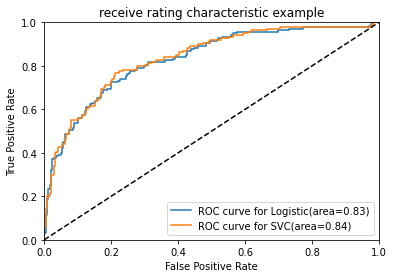

In [52]:
# Plot the ROc

# Plot ROC curve

pl.clf()
pl.plot(fpr1, tpr1, label = 'ROC curve for Logistic(area=%0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label = 'ROC curve for SVC(area=%0.2f)' % roc_auc2)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel("False Positive Rate")
pl.ylabel("True Positive Rate")
pl.title('receive rating characteristic example')
pl.legend(loc="lower right")
pl.show()
